### Importación de bibliotecas

In [1]:
# Biblioteca para manejo de arreglos y matrices
import numpy as np
# Biblioteca para lectura y escritura de imágenes
from PIL import Image
# Biblioteca para creación de gráficas
from matplotlib import pyplot as plt

### Lectura de imágenes

In [2]:
img_rgb = Image.open('assets/labrador.jpg')

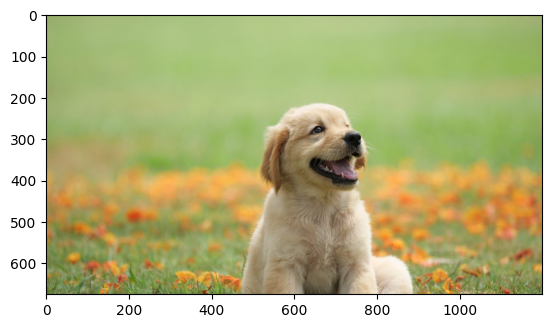

In [3]:
# Mostrar una imagen utilizando matplotlib
plt.imshow(img_rgb)

In [4]:
# Transformación de un objeto de tipo Image a arreglo
array_gray = np.array(img_rgb)

In [5]:
# Obtener alto y ancho de una imagen
width, height = array_gray.shape[0], array_gray.shape[1]

### Escala de Grises

In [6]:
# Factores de iluminación
luma_red = 0.299
luma_green = 0.587
luma_blue = 0.114

In [7]:
# Se recorren las filas de la matriz
for y in range(height):
    # Se recorren las columnas de la matriz
    for x in range(width):
        # Obtención del valor de cada color del pixel
        red = array_gray[x][y][0]
        green = array_gray[x][y][1]
        blue = array_gray[x][y][2]
        
        # El pixel se modifica con el valor de gris correspondiente
        array_gray[x][y] = red * luma_red + green * luma_green + blue * luma_blue

In [8]:
# La matriz se transforma a un objeto de tipo Image
img_gray = Image.fromarray(array_gray)

In [9]:
# La imagen modificada se guarda
img_gray.save('assets/labrador_escala_grises.jpg')

### Histograma de una imagen

In [10]:
# Arreglo para guardar los valores de frecuencia
histograma = [0] * 256

In [11]:
for y in range(height):
    for x in range(width):
        pixel_value = array_gray[x][y][0]
        # Aumenta la frecuencia en uno en ese pixel
        histograma[pixel_value] += 1

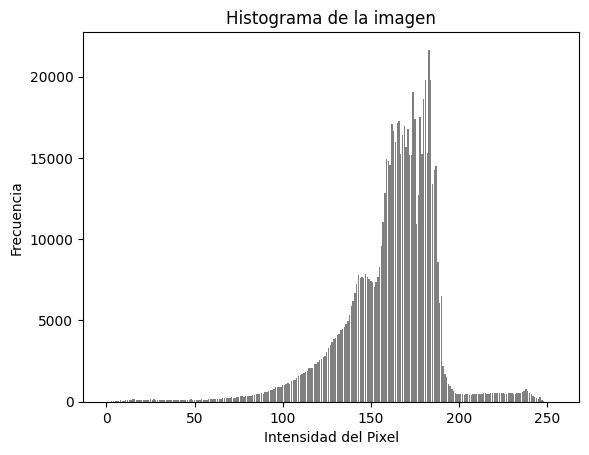

In [12]:
# Gráfica de barras
plt.bar(range(256), histograma, color='gray')
# Etiqueta del eje x
plt.xlabel('Intensidad del Pixel')
# Etiqueta del eje y
plt.ylabel('Frecuencia')
# Titulo de la gráfica
plt.title('Histograma de la imagen')
plt.show()

### Binarización

In [13]:
# Umbral de la binarización
threshold = 100

In [14]:
# Matriz de ceros con las dimensiones de la imagen en escala de grises
array_binary = np.zeros_like(array_gray)

In [15]:
for y in range(height):
    for x in range(width):
        pixel_value = array_gray[x][y][0]

        # Se compara el valor del pixel con el umbral
        if pixel_value > threshold:
            # Si el valor del pixel es mayor que el umbral, se cambia a 255 (blanco)
            array_binary[x, y] = 255
        else:
            # Si es menor, el valor cambia a 0 (negro)
            array_binary[x, y] = 0

In [16]:
img_binary = Image.fromarray(array_binary)

In [17]:
img_binary.save('assets/labrador_binario.jpg')

### Rotación de imágenes

In [18]:
angle = 45

In [19]:
# Cálculo del punto central de una imagen
center_x, center_y = height // 2, width // 2

In [20]:
array_rotated = np.zeros_like(array_gray)

In [21]:
for y in range(height):
    for x in range(width):
        new_x = int(np.cos(np.radians(angle)) * (x - center_x) - np.sin(np.radians(angle)) * (y - center_y) + center_x)
        new_y = int(np.sin(np.radians(angle)) * (x - center_x) + np.cos(np.radians(angle)) * (y - center_y) + center_y)

        if 0 <= new_x < width and 0 <= new_y < height:
            array_rotated[new_x][new_y] = array_binary[x][y]

In [22]:
img_rotated = Image.fromarray(array_rotated)

In [23]:
img_rotated.save('assets/labrador_rotated.jpg')

### Recortar imágenes

In [24]:
# Coordenadas de la región de interés
x1, y1, x2, y2 = 400, 100, 800, 800

In [25]:
# Segmentación de la matriz usando las coordenadas 
array_cropped = array_gray[y1:y2, x1:x2]

In [26]:
img_cropped = Image.fromarray(array_cropped)

In [27]:
img_cropped.save('assets/labrador_recortada.jpg')